In [1]:
import matplotlib.pyplot as plt
from maad import sound, util
from maad.rois import template_matching

In [2]:
# Set spectrogram parameters
tlims = (0.415, 0.565)
flims = (150, 12000)
nperseg = 1024
noverlap = 512
window = 'hann'
db_range = 80

# load data
s, fs = sound.load('incidences _resonances.wav')

# Compute spectrogram for template signal
Sxx_template, _, _, _ = sound.spectrogram(s, fs, window, nperseg, noverlap, flims, tlims)
Sxx_template = util.power2dB(Sxx_template, db_range)

# Compute spectrogram for target audio
Sxx_audio, tn, fn, ext = sound.spectrogram(s, fs, window, nperseg, noverlap, flims)
Sxx_audio = util.power2dB(Sxx_audio, db_range)

In [3]:
peak_th = 0.65 # set the threshold to find peaks
xcorrcoef, rois = template_matching(Sxx_audio, Sxx_template, tn, ext, peak_th)
rois['min_f'] = flims[0]
rois['max_f'] = flims[1]
display(rois)

,peak_time,xcorrcoef,min_t,max_t,min_f,max_f
0,0.487619,1.000000,0.412154,0.563084,150,12000
1,11.400998,0.802544,11.325533,11.476463,150,12000
2,12.120816,0.882240,12.045351,12.196281,150,12000
3,14.059683,0.705333,13.984218,14.135147,150,12000
4,14.164172,0.720297,14.088707,14.239637,150,12000
5,25.681270,0.782858,25.605805,25.756735,150,12000
6,46.695329,0.823816,46.619864,46.770794,150,12000
7,61.022041,0.767176,60.946576,61.097506,150,12000
8,73.317007,0.890743,73.241542,73.392472,150,12000
9,74.222585,0.786542,74.147120,74.298050,150,12000


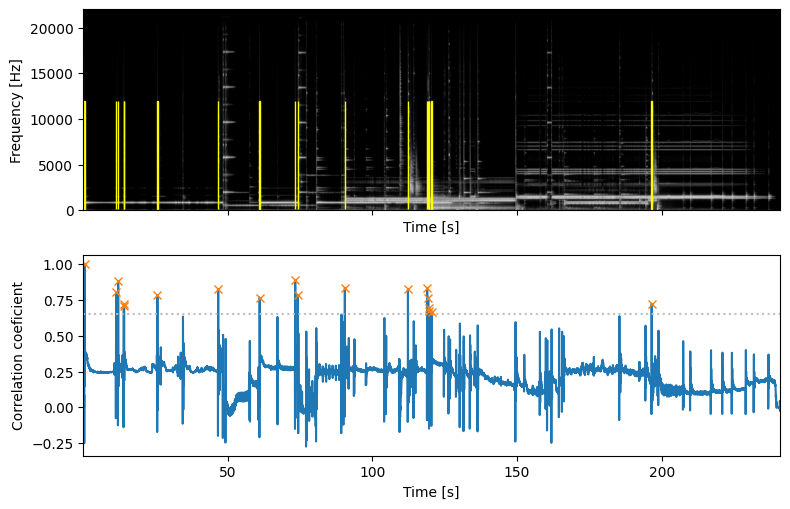

In [4]:
Sxx, tn, fn, ext = sound.spectrogram(s, fs, window, nperseg, noverlap)
fig, ax = plt.subplots(2,1, figsize=(8, 5), sharex=True)
util.plot_spectrogram(Sxx, ext, db_range=80, ax=ax[0], colorbar=False)
util.overlay_rois(Sxx, util.format_features(rois, tn, fn), fig=fig, ax=ax[0])
ax[1].plot(tn[0: xcorrcoef.shape[0]], xcorrcoef)
ax[1].hlines(peak_th, 0, tn[-1], linestyle='dotted', color='0.75')
ax[1].plot(rois.peak_time, rois.xcorrcoef, 'x')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Correlation coeficient')
plt.show()